In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
import os
from matplotlib import pyplot
import seaborn as sns
from collections import Counter

# Load Dataset and store the pixel values in X

In [2]:
all_images = []
all_image_files = []

In [3]:
dataset_folder_1 = "Datasets/coil-20/coil-20-proc"
image_files_1 = os.listdir(dataset_folder_1)

for each_image in image_files_1:
    if each_image.endswith(".png"):
        im = img.imread(f"{dataset_folder_1}/{each_image}")
        all_images.append(im)

In [4]:
Counter([file.split("__")[0] for file in image_files_1])

Counter({'obj10': 72,
         'obj11': 72,
         'obj12': 72,
         'obj13': 72,
         'obj14': 72,
         'obj15': 72,
         'obj16': 72,
         'obj17': 72,
         'obj18': 72,
         'obj19': 72,
         'obj1': 72,
         'obj20': 72,
         'obj2': 72,
         'obj3': 72,
         'obj4': 72,
         'obj5': 72,
         'obj6': 72,
         'obj7': 72,
         'obj8': 72,
         'obj9': 72})

In [5]:
all_image_files = image_files_1

In [6]:
len(all_image_files)

1440

In [7]:
n_images = len(all_images)

In [8]:
all_images[0].shape

(128, 128)

# Plot sample Images

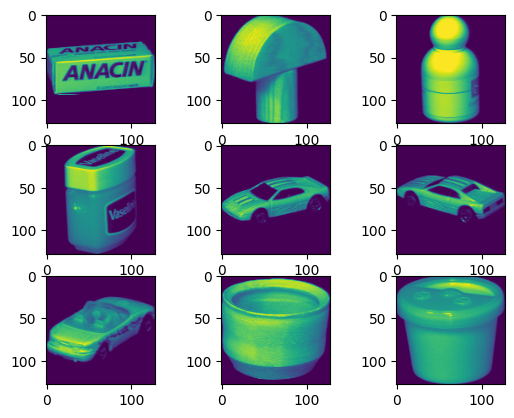

In [9]:
#plt.subplots(3,3)
fig = plt.figure()
rows, columns = 3,3

num = 1
for k in np.random.choice(range(1,n_images), 9):
    fig.add_subplot(rows, columns, num)
    plt.imshow(all_images[k])
    num+=1

# For complexity, we can stick to grayscale

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

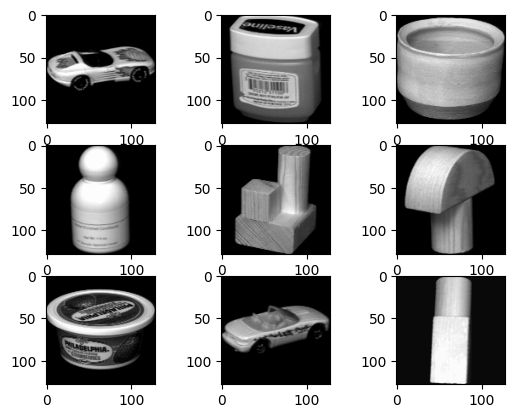

In [11]:
#plt.subplots(3,3)
fig = plt.figure()
rows, columns = 3,3

num = 1
for k in np.random.choice(range(1,n_images), 9):
    fig.add_subplot(rows, columns, num)
    image = all_images[k]
    plt.imshow(image, cmap='gray')
    num+=1



# Plot image of same object from different angles

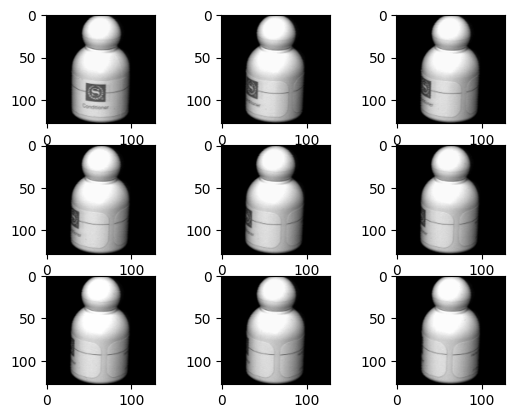

In [12]:
fig = plt.figure()
rows, columns = 3,3

image_name = f"obj{np.random.randint(1,20)}__1.png"
idx = all_image_files.index(image_name)
k=0

while k < rows*columns:
    fig.add_subplot(rows, columns, k+1)
    image = all_images[idx + k]
    plt.imshow(image, cmap='gray')
    k+=1

# Clustering -> we will be using Grayscale image to simplify problem
- KMeans
- Gaussian Mixture Model 

In [13]:
all_images[0].flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
X = np.vstack([img.flatten() for img in all_images])

In [15]:
X[0].shape, len(X)

((16384,), 1440)

In [16]:
X.max(),  np.array(X).min()

(1.0, 0.0)

# Reduce Dimensionality - PCA

### 1. How many components explain 95% of the Variance in the Data?

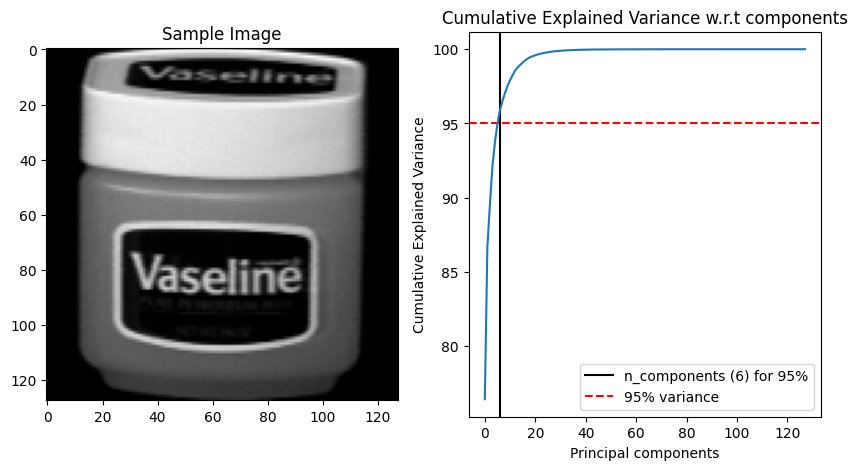

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA()
pca.fit(all_images[0])

# Get the cumulative Variance after applying per components

cum_variance = np.cumsum(pca.explained_variance_ratio_)*100

# Number of components that explain more than 95%
k = np.argmax(cum_variance > 95)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

image = all_images[0]
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Sample Image")

axs[1].axvline(x=k, color='k', linestyle="-", label=f"n_components ({k}) for 95%")
axs[1].axhline(y=95, color='r', linestyle="--", label = "95% variance")
axs[1].plot(cum_variance)
axs[1].set_title("Cumulative Explained Variance w.r.t components")
axs[1].set_xlabel("Principal components")
axs[1].set_ylabel("Cumulative Explained Variance")
axs[1].legend()

In [18]:
k

6

### 2. How does the reconstructed images / information loss look as we reduce the dimensions

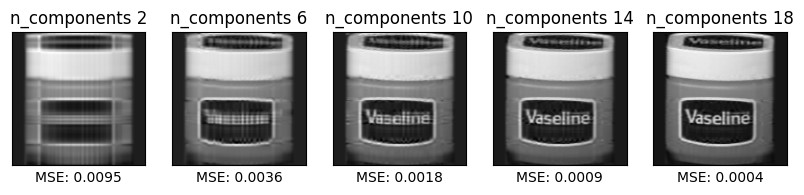

In [19]:
sample_image = all_images[0]
fig, axs = plt.subplots(1, 5, figsize=(10, 10))


for i,n in enumerate(range(2, 20, 4)):
    pca = PCA(n_components=n)
    image_compressed = pca.fit_transform(sample_image)
    image_reconstructed = pca.inverse_transform(image_compressed)

    image_reconstructed = image_reconstructed.reshape(sample_image.shape)

    # Measure Reconstruction Error
    mse = mean_squared_error(sample_image.flatten(), image_reconstructed.flatten())
    mse = "{:.4f}".format(mse)
    
    #fig.add_subplot(rows, columns, n)
    #plt.imshow(image_reconstructed, cmap='gray')
    #plt.title(f"n_components {n}")
    axs[i].imshow(image_reconstructed, cmap='gray')
    axs[i].set_title(f"n_components {n}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel(f'MSE: {mse}')
#plt.subplots_adjust(wspace=0.8)

# Analyzing Princpial Components for selected images
- Want to understand what features are the most important in images -> Edges, specific curves, texture, etc
- Try to understand what each principal component conveys
- Certain principal components emphasize edges (Top ones), while others highlight specific shapes or strokes, some highlight the font region, etc

In [20]:
def plot_components_for_specific_images(input_data, num_components):

    # Plot original Images
    fig, axes = plt.subplots(1, len(input_data), figsize=(12, 6))
    for i,x in enumerate(input_data):
        # Reshape the principal component to the original image shape
        img = x.reshape(sample_image.shape)
        
        # Plot the principal component
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')
    
    pca = PCA(n_components=num_components)
    pca.fit(input_data)
    
    # Get the principal components
    principal_components = pca.components_
    print (len(principal_components))
    
    
    # Visualize the principal components
    fig, axes = plt.subplots(1, num_components, figsize=(12, 6))
    
    for i in range(num_components):
        # Reshape the principal component to the original image shape
        reconstructed_component = principal_components[i].reshape(sample_image.shape)
        
        # Plot the principal component
        axes[i].imshow(reconstructed_component, cmap='gray')
        axes[i].set_title(f"PC {i+1}")
        axes[i].axis('off')
    
    plt.show()

10


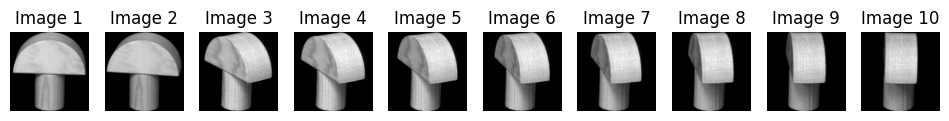

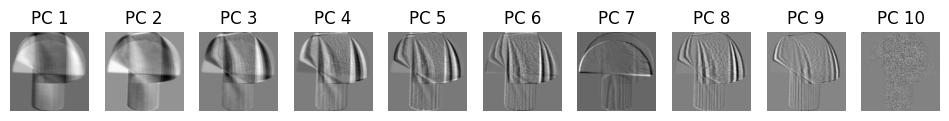

In [21]:
num_components = 10  # Number of principal components to keep
input_data = X[72:82]
plot_components_for_specific_images(input_data, num_components)

10


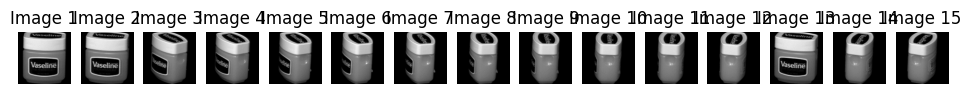

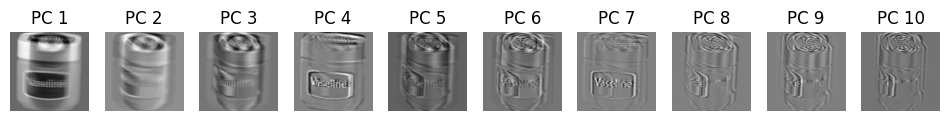

In [22]:
num_components = 10  # Number of principal components to keep
input_data = X[:15]
plot_components_for_specific_images(input_data, num_components)

10


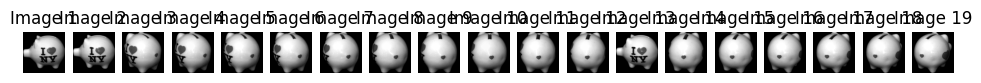

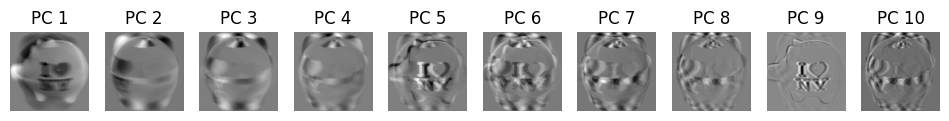

In [23]:
num_components = 10  # Number of principal components to keep
input_data = X[216:235]
plot_components_for_specific_images(input_data, num_components)

# PCA fit on all Data

In [24]:
X.shape

(1440, 16384)

400


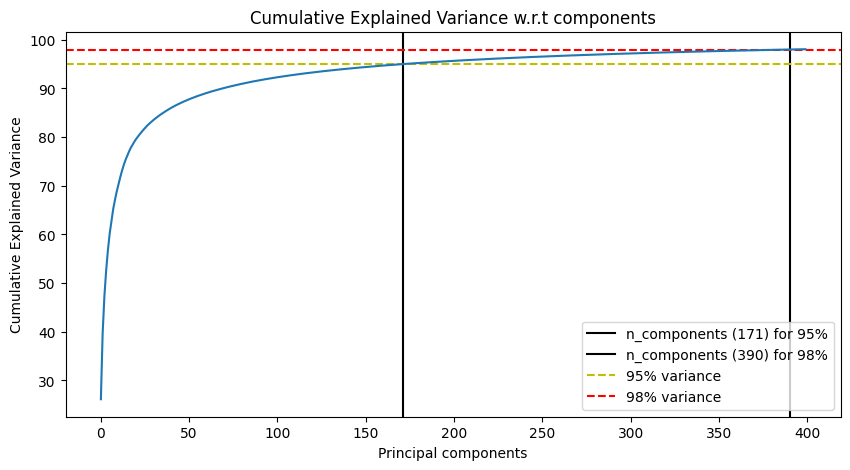

In [25]:

pca = PCA(n_components=400)
pca.fit(X)

# Get the principal components
principal_components = pca.components_
print (len(principal_components))


# Get the cumulative Variance after applying per components

cum_variance = np.cumsum(pca.explained_variance_ratio_)*100

# Number of components that explain more than 95%
k1 = np.argmax(cum_variance > 95)
k2 = np.argmax(cum_variance > 98)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

#image = all_images[0]
#axs[0].imshow(image, cmap='gray')
#axs[0].set_title("Sample Image")

axs.axvline(x=k1, color='k', linestyle="-", label=f"n_components ({k1}) for 95%")
axs.axvline(x=k2, color='k', linestyle="-", label=f"n_components ({k2}) for 98%")
axs.axhline(y=95, color='y', linestyle="--", label = "95% variance")
axs.axhline(y=98, color='r', linestyle="--", label = "98% variance")
axs.plot(cum_variance)
axs.set_title("Cumulative Explained Variance w.r.t components")
axs.set_xlabel("Principal components")
axs.set_ylabel("Cumulative Explained Variance")
axs.legend()

# Reduce Dimensionality - ICA

In [26]:
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis

C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


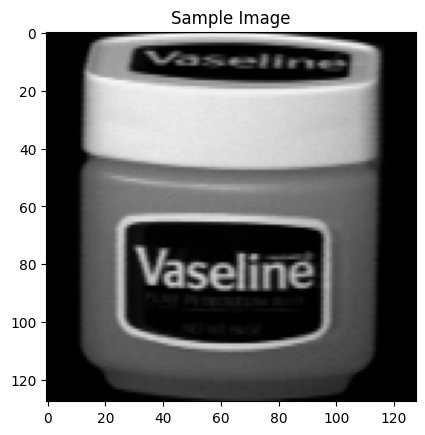

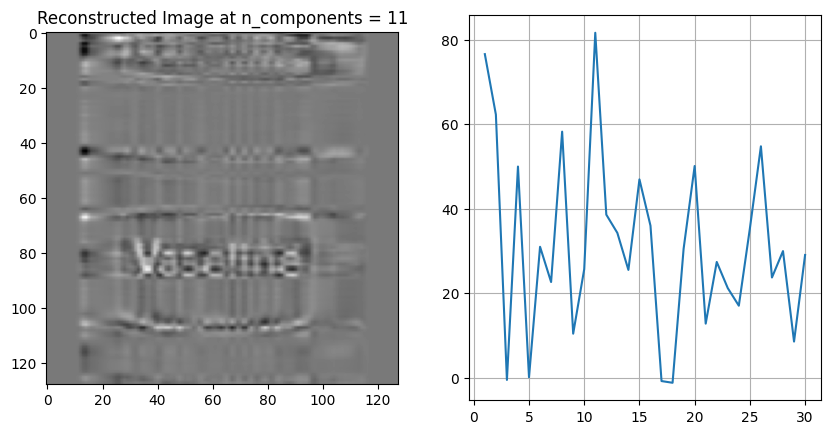

In [27]:
sample_image = all_images[0]
n_components_max = 30



ica = FastICA(n_components = n_components_max, algorithm='parallel')
S_ica = ica.fit_transform(sample_image)
ks = [kurtosis(S_ica[:, i]) for i in range(S_ica.shape[1])]
n_components = np.argmax(ks) + 1

ica = FastICA(n_components = n_components)
sample_image_reduced = ica.fit_transform(sample_image)

# Get the cumulative Variance after applying per components
X_reconstructed = np.dot(sample_image_reduced, ica.components_)
    

plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")

fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].imshow(X_reconstructed, cmap='gray')
axs[0].set_title(f"Reconstructed Image at n_components = {n_components}")

plt.grid()
axs[1].plot([x+1 for x in range(n_components_max)], ks)
#axs[1].set_xlabels([x+1 for x in range(30)])

### 2. How does the reconstructed images / information loss look as we reduce the dimensions

C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


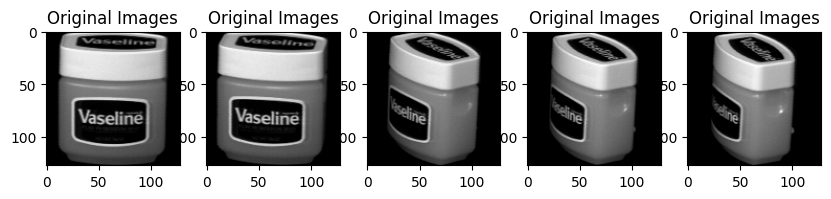

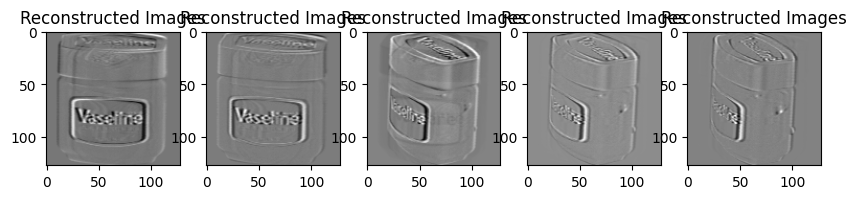

In [28]:
sample_image = all_images[0]

n_components_range = range(1, 21)
reconstructed_images = []
performance_scores = []

#input_image = sample_image.flatten().reshape(1, -1)
input_images = X[:20]

# Find the optimal number of components
n_components_range = range(1, 21)
reconstruction_errors = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components, random_state=42)
    reduced_data = ica.fit_transform(input_images)
    reconstructed_images = np.dot(reduced_data, ica.components_)
    mse = mean_squared_error(input_images, reconstructed_images)
    reconstruction_errors.append(mse)

# Find the optimal number of components
optimal_components = np.argmin(reconstruction_errors) + 1  # +1 because indexing starts from 0

# Apply ICA with the optimal number of components
ica = FastICA(n_components=optimal_components, random_state=42)
reduced_data = ica.fit_transform(input_images)
components = ica.components_
reconstructed_images = np.dot(reduced_data, components)

# Reshape the reconstructed images back to 2D
reconstructed_images = [image.reshape(sample_image.shape) for image in reconstructed_images]

# Visualize the original and reconstructed images
fig, axs = plt.subplots(1,5, figsize=(10, 5))
plt.title("Original Images")
for i, each_img in enumerate(input_images[:5]):
    axs[i].imshow(each_img.reshape(sample_image.shape), cmap='gray')
    axs[i].set_title("Original Images")

fig, axs = plt.subplots(1,5, figsize=(10, 5))
for i, each_img in enumerate(reconstructed_images[:5]):
    axs[i].imshow(each_img, cmap='gray')
    axs[i].set_title("Reconstructed Images")

C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


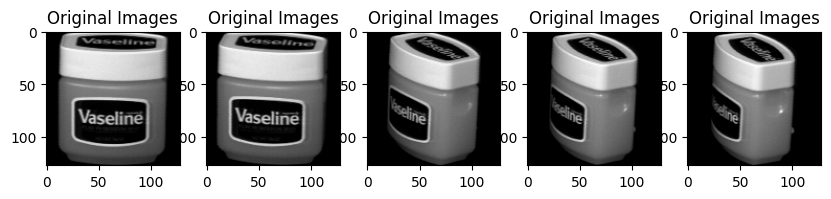

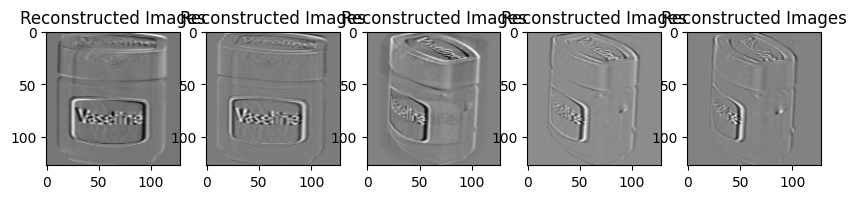

In [29]:
# Step 2: Find the optimal number of components using kurtosis
n_components_range = range(1, 21)
kurtosis_values = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components, random_state=42)
    ica.fit(input_images)
    kurtosis_components = kurtosis(ica.components_, axis=1)
    mean_kurtosis = np.mean(kurtosis_components)
    kurtosis_values.append(mean_kurtosis)

# Find the optimal number of components based on kurtosis
optimal_components = np.argmax(kurtosis_values) + 1  # +1 because indexing starts from 0

# Apply ICA with the optimal number of components
ica = FastICA(n_components=optimal_components, random_state=42)
reduced_data = ica.fit_transform(input_images)
components = ica.components_
reconstructed_images = np.dot(reduced_data, components)

# Reshape the reconstructed images back to 2D
reconstructed_images = [image.reshape(sample_image.shape) for image in reconstructed_images]

# Visualize the original and reconstructed images
fig, axs = plt.subplots(1,5, figsize=(10, 5))
plt.title("Original Images")
for i, each_img in enumerate(input_images[:5]):
    axs[i].imshow(each_img.reshape(sample_image.shape), cmap='gray')
    axs[i].set_title("Original Images")

fig, axs = plt.subplots(1,5, figsize=(10, 5))
for i, each_img in enumerate(reconstructed_images[:5]):
    axs[i].imshow(each_img, cmap='gray')
    axs[i].set_title("Reconstructed Images")

### ICA fit on all Data

1
2
3
4
5
6


C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


7


C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


8


C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


9


C:\Users\vyassum\.pyenv\pyenv-win\versions\3.10.1\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


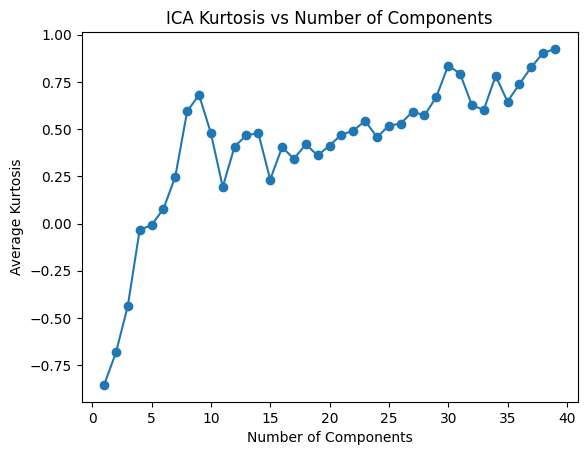

In [30]:
n_components_range = range(1, 40)
kurtosis_values = []

for n_components in n_components_range:  
    print (n_components)
    ica = FastICA(n_components=n_components)
    ica.fit(X)
    kurtosis_components = kurtosis(ica.components_, axis=1)
    mean_kurtosis = np.mean(kurtosis_components)
    kurtosis_values.append(mean_kurtosis)
    
# Plot kurtosis values against number of components
plt.plot(n_components_range, kurtosis_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Kurtosis')
plt.title('ICA Kurtosis vs Number of Components')
plt.show()

# 3. Randomized Projections

In [36]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.metrics import pairwise_distances

In [37]:
X.shape

(1440, 16384)

### Finding optimal number of reduced dimensions based on input data samples

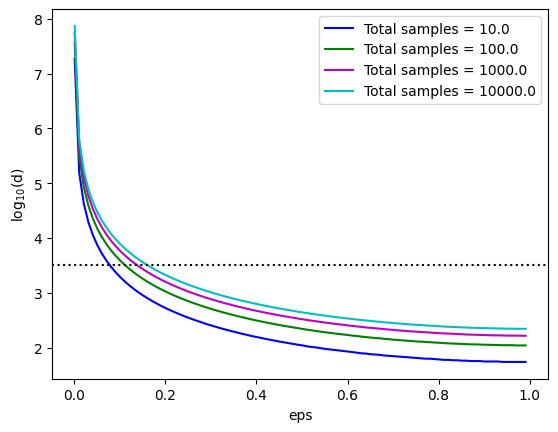

In [40]:
eps = np.arange(0.001, 0.999, 0.01)
colors = ['b', 'g', 'm', 'c']
m = [1e1, 1e2, 1e3, 1e4] # Multiple orders of data


for i in range(4):
    min_dim = johnson_lindenstrauss_min_dim(n_samples=m[i], eps=eps)
    label = 'Total samples = ' + str(m[i])
    plt.plot(eps, np.log10(min_dim), c=colors[i], label=label)
    
plt.xlabel('eps')
plt.ylabel('log$_{10}$(d)')
plt.axhline(y=3.5, color='k', linestyle=':')
plt.legend()
plt.show()

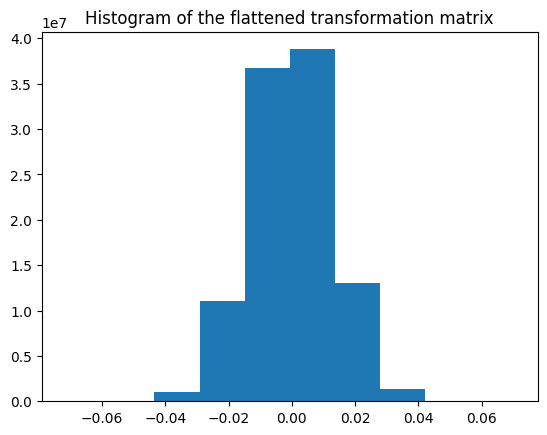

In [41]:
proj_gauss = GaussianRandomProjection(random_state=0)
X_transformed = proj_gauss.fit_transform(X)

plt.hist(proj_gauss.components_.flatten())
plt.title('Histogram of the flattened transformation matrix')
plt.show()

In [87]:
from sklearn.metrics.pairwise import euclidean_distances

In [71]:
np.arange(0.001, 0.999, 0.05)

array([0.001, 0.051, 0.101, 0.151, 0.201, 0.251, 0.301, 0.351, 0.401,
       0.451, 0.501, 0.551, 0.601, 0.651, 0.701, 0.751, 0.801, 0.851,
       0.901, 0.951])

In [79]:
reduction_dim_gauss = []
eps_arr_gauss = []
mean_abs_diff_gauss = []

for eps in np.arange(0.1, 0.999, 0.1):
    min_dim = johnson_lindenstrauss_min_dim(n_samples=X.shape[0], eps=eps);
    
    if min_dim > X.shape[1]:
        continue
    gauss_proj = GaussianRandomProjection(random_state=0, eps=eps)
    X_transform = gauss_proj.fit_transform(X)
        #gauss_proj = SparseRandomProjection(random_state=0, eps=eps, dense_output=1)
        #X_transform = sparse_proj.fit_transform(X)
    dist_raw = euclidean_distances(X)
    dist_transform = euclidean_distances(X_transform)
    abs_diff_gauss = abs(dist_raw - dist_transform)
    '''
    # Plot differences euclidean
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    
    plt.subplot(121)
    plt.imshow(abs_diff_gauss)
    plt.colorbar()
    plt.title('Visualization of absolute differences')
    
    plt.subplot(122)
    ax = plt.hist(abs_diff_gauss.flatten())
    plt.title('Histogram of absolute differences')
    plt.suptitle('eps = ' + '{:.2f}'.format(eps) + ', n_components = ' + str(X_transformed.shape[1]))
    '''
    reduction_dim_gauss.append(100-X_transform.shape[1]/X.shape[1]*100)
    eps_arr_gauss.append(eps)
    mean_abs_diff_gauss.append(np.mean(abs_diff_gauss.flatten()))

The images of the absolute difference matrix and its corresponding histogram indicate that most of the values are close to zero. 
Hence, a large majority of the pair of points maintain their actual distance in the low dimensional space, retaining the original structure of data.

To assess the quality of transformation, let's plot the mean absolute difference against eps. 
Also, the higher the value of eps, the greater the dimensionality reduction. Let's also plot the percentage reduction vs. eps in a second sub-plot:

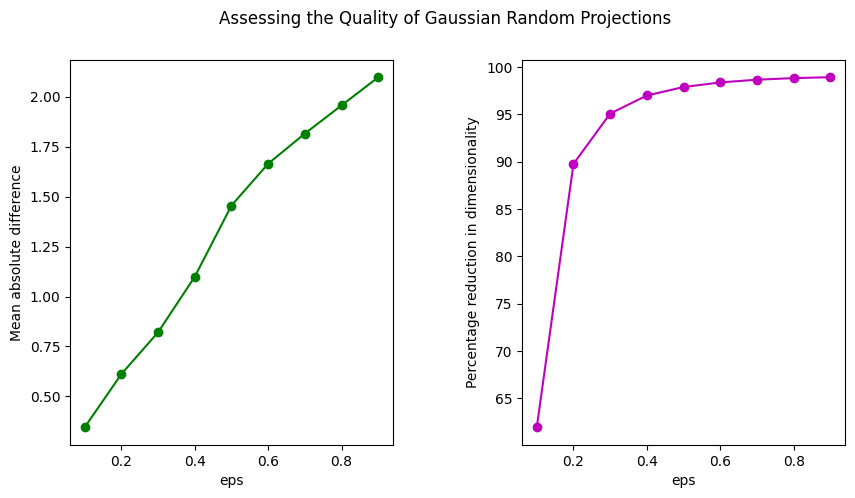

In [80]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.subplot(121)
plt.plot(eps_arr_gauss, mean_abs_diff_gauss, marker='o', c='g')
plt.xlabel('eps')
plt.ylabel('Mean absolute difference')

plt.subplot(122)
plt.plot(eps_arr_gauss, reduction_dim_gauss, marker = 'o', c='m')
plt.xlabel('eps')
plt.ylabel('Percentage reduction in dimensionality')

fig.subplots_adjust(wspace=.4) 
plt.suptitle('Assessing the Quality of Gaussian Random Projections')
plt.show()

Text(0.5, 0.98, 'eps = 0.90, n_components = 6233')

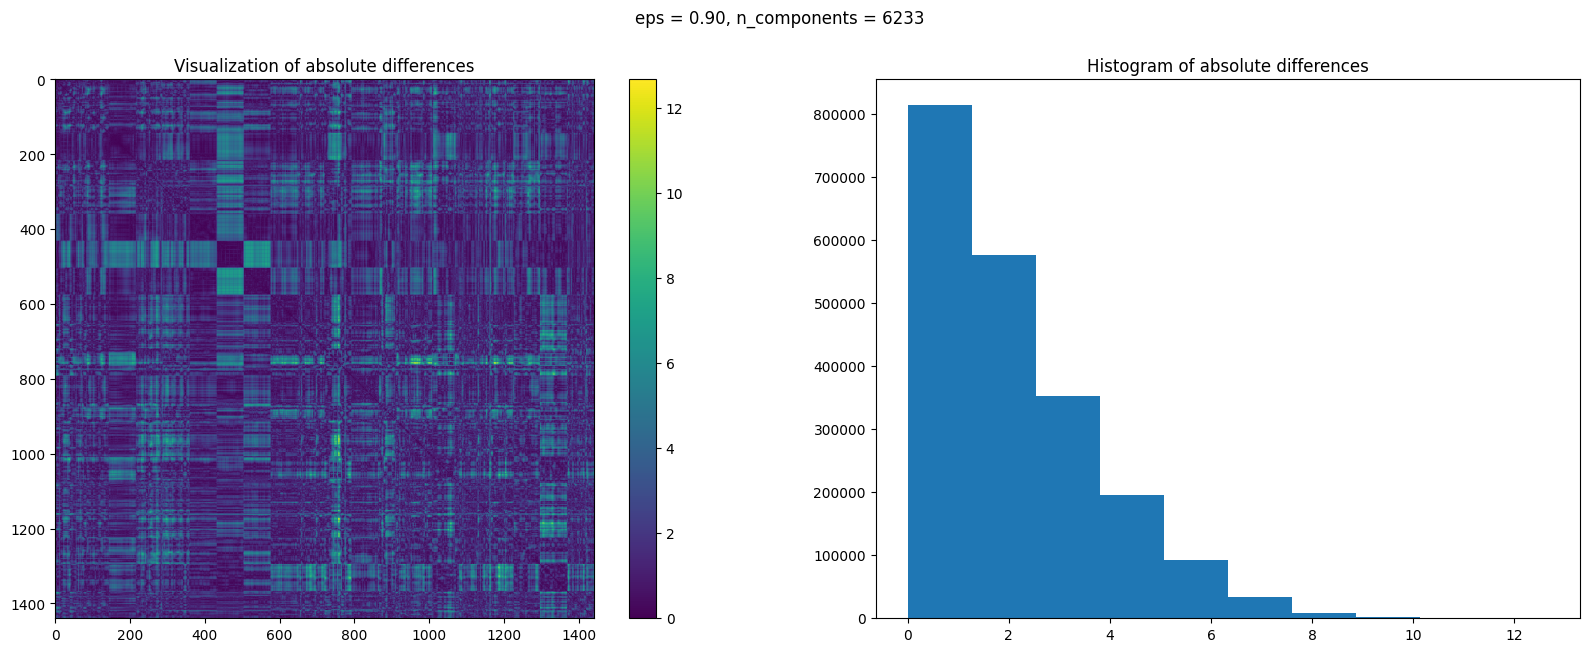

In [81]:
# Plot differences euclidean
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.subplot(121)
plt.imshow(abs_diff_gauss)
plt.colorbar()
plt.title('Visualization of absolute differences')

plt.subplot(122)
ax = plt.hist(abs_diff_gauss.flatten())
plt.title('Histogram of absolute differences')
plt.suptitle('eps = ' + '{:.2f}'.format(eps) + ', n_components = ' + str(X_transformed.shape[1]))

### Reconstructed Image after reducing dimensions

Text(0.5, 1.0, 'Reconstructed Image at n_components = 16000')

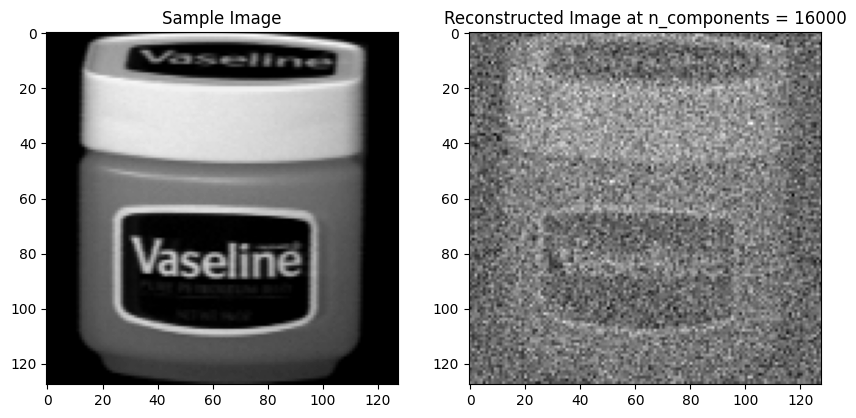

In [132]:
sample_image = all_images[0]

image_vector = sample_image.reshape(-1)

# Define the desired reduced dimension
reduced_dimension = 16000  # or any other desired value less than 128*128
projection_matrix = GaussianRandomProjection(n_components=reduced_dimension)
reduced_image_vector = projection_matrix.fit_transform(image_vector.reshape(1, -1))

# Reconstruct the image
reconstructed_image_vector = np.dot(reduced_image_vector, projection_matrix.components_)
reconstructed_image = reconstructed_image_vector.reshape(sample_image.shape)

fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].imshow(sample_image, cmap='gray')
axs[0].set_title("Sample Image")


axs[1].imshow(reconstructed_image, cmap='gray')
axs[1].set_title(f"Reconstructed Image at n_components = {reduced_dimension}")

#plt.grid()
#axs[1].plot([x+1 for x in range(n_components_max)], ks)
#axs[1].set_xlabels([x+1 for x in range(30)])

## Reconstruction as per reducing dimension

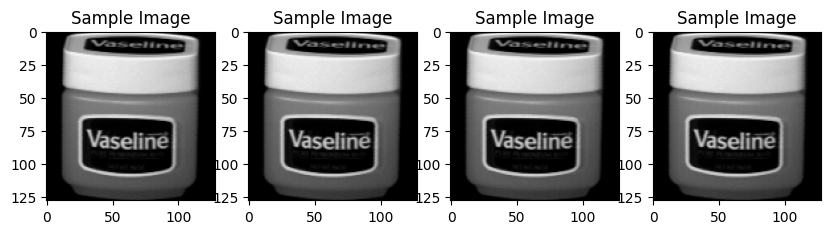

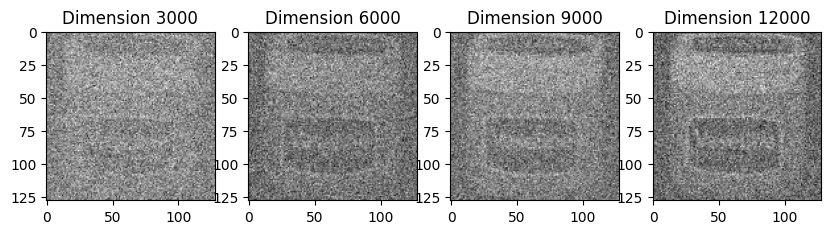

In [141]:
sample_image = all_images[0]
reconstructed_images = []
dim_range = range(3000,12005, 3000)

for dim in dim_range:
    image_vector = sample_image.reshape(-1)
    
    # Define the desired reduced dimension
    projection_matrix = GaussianRandomProjection(n_components=dim)
    reduced_image_vector = projection_matrix.fit_transform(image_vector.reshape(1, -1))
    
    # Reconstruct the image
    reconstructed_image_vector = np.dot(reduced_image_vector, projection_matrix.components_)
    reconstructed_images.append(reconstructed_image_vector.reshape(sample_image.shape))
    

fig, axs = plt.subplots(1,4,figsize=(10, 5))
for i,each_img in enumerate(reconstructed_images):
    axs[i].imshow(sample_image, cmap='gray')
    axs[i].set_title("Sample Image")

fig, axs = plt.subplots(1,4,figsize=(10, 5))
for i,(each_img, dim) in enumerate(zip(reconstructed_images, dim_range)):
    axs[i].imshow(each_img, cmap='gray')
    axs[i].set_title(f"Dimension {dim}")

# Manifold Techniques: Multidimensional Scaling

In [83]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

In [85]:
dist_euclid = euclidean_distances(X)

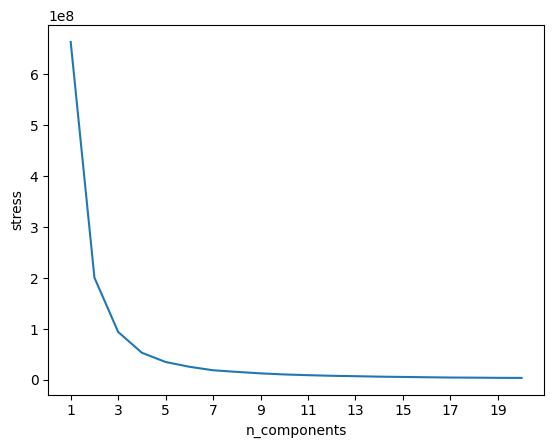

In [86]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [ ]:
# Flatten the image to convert it into a 1D array
flattened_image = sample_image.flatten()

# Dimensionality reduction using MDS
# Reduce the dimensionality from 128x128 to 64
n_components = 100
mds = MDS(n_components=n_components)
transformed_image = mds.fit_transform(flattened_image.reshape(-1, 1))

# Reconstruct the image
reconstructed_image = mds.inverse_transform(transformed_image)

# Reshape the reconstructed image to its original shape
reconstructed_image = reconstructed_image.reshape(sample_image.shape)

# Plot the original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image (MDS)')
plt.imshow(reconstructed_image, cmap='gray')

plt.show()

# Apply dimensionality Reduction on the Dataset and do clustering

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
import os
from matplotlib import pyplot
import seaborn as sns
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [193]:
all_images = []
all_image_files = []

dataset_folder_1 = "Datasets/coil-20/coil-20-proc"
image_files_1 = os.listdir(dataset_folder_1)

for each_image in image_files_1:
    if each_image.endswith(".png"):
        im = img.imread(f"{dataset_folder_1}/{each_image}")
        all_images.append(im)

all_image_files = image_files_1

In [194]:
X = np.vstack([img.flatten() for img in all_images])

# Common Functions

In [281]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

def measure_cluster_metrics(cluster_labels, title):
    y_true = [int(file.split("__")[0].replace("obj","")) for file in image_files_1]
    
    ari = adjusted_rand_score(y_true, cluster_labels)
    nmi = normalized_mutual_info_score(y_true, cluster_labels)
    fmi = fowlkes_mallows_score(y_true, cluster_labels)
    print (title)
    print (ari, nmi, fmi)
    return ari, nmi, fmi

def plot_cluster_distribution(cls_method, k_optimal, cluster_labels, dim_reduction = 'pca',):
    cluster_dict = Counter(cluster_labels)
    ax = sns.barplot(x=list(cluster_dict.keys()), y=list(cluster_dict.values()), color='skyblue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    for i in ax.containers:
        ax.bar_label(i,)
    title = f"{dim_reduction} - {cls_method} - {k_optimal}"
    plt.title(title)
    plt.savefig(title)

In [320]:
def measure_cluster_metrics_custom(cluster_labels, y_true, title):
    #y_true = [int(file.split("__")[0].replace("obj","")) for file in image_files_1]
    
    ari = adjusted_rand_score(y_true, cluster_labels)
    nmi = normalized_mutual_info_score(y_true, cluster_labels)
    fmi = fowlkes_mallows_score(y_true, cluster_labels)
    print (title)
    print (ari, nmi, fmi)
    return ari, nmi, fmi

# KMeans - Functions

In [290]:
def get_metrics(model, X):
    cluster_labels = model.predict(X)

    # Record Inertia
    inertia = model.inertia_
    
    # Record Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute silhouette values for each datapoint
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    return inertia, silhouette_avg, sample_silhouette_values


def kmeans_results(X_reduced):
    wcss = []
    silhouette_scores = []
    silhouette_sample_values = []
    cluster_range = range(2, 30)
    
    for i in range(2, 30):
        #print (i)
        kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42, n_init=10, algorithm='elkan')
        kmeans.fit(X_reduced)
    
        inertia, silhouette_avg, sample_silhouette_values = get_metrics(kmeans, X_reduced)
    
        wcss.append(inertia)
        silhouette_scores.append(silhouette_avg)
        silhouette_sample_values.append(sample_silhouette_values)
    return wcss, silhouette_scores, silhouette_sample_values

def optimal_k(wcss):
    deltas = np.diff(wcss, 2)
    optimal_k = np.argmin(deltas) + 2
    return optimal_k

In [293]:
def run_kmeans_experiment(X_reduced, dim_reduction):
    wcss, silhouette_scores, silhouette_sample_values = kmeans_results(X_reduced)
    
    # Find Optimal K
    k_optimal = optimal_k(wcss)
    
    # Get y-labels
    kmeans_pca = KMeans(n_clusters = k_optimal, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
    kmeans_pca.fit(X_reduced)
    cluster_labels_kmeans = kmeans_pca.predict(X_reduced)

    plot_cluster_distribution("kmeans", k_optimal, cluster_labels_kmeans, dim_reduction)
    title = f"{dim_reduction} - kmeans - {k_optimal}"
    measure_cluster_metrics(cluster_labels_kmeans, title)

In [337]:

   def compare_closeness_to_original_clusters_kmeans(X, X_reduced, title_1, title_2):

    # Original
    kmeans = KMeans(n_clusters = 20, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    
    # Get y-labels
    kmeans_pca = KMeans(n_clusters = 20, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
    kmeans_pca.fit(X_reduced)
    cluster_labels_kmeans = kmeans_pca.predict(X_reduced)

    # Measure closeness original clusters when dimension not reduced
    measure_cluster_metrics(cluster_labels_kmeans, title_1)
    
    # Measure closeness to Ground Truth
    measure_cluster_metrics_custom(cluster_labels_kmeans, cluster_labels, title_2)

# GMM Functions

In [314]:
from sklearn.mixture import GaussianMixture

def get_metrics_gmm(model, X):
    cluster_labels = model.predict(X)

    # Record Inertia
    log_likelihood = model.score(X)

    bic = model.bic(X)
    
    # Record Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute silhouette values for each datapoint
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    return log_likelihood, bic, silhouette_avg, sample_silhouette_values


def gmm_results(X_reduced):
    log_likelihood_scores = []
    silhouette_scores = []
    silhouette_sample_values = []
    bic_values = []
    cluster_range = range(2, 30)
    
    for i in range(2, 22):
        print (i)
        gmm = GaussianMixture(n_components = i, init_params = "k-means++", random_state = 42, n_init=2, covariance_type='diag', reg_covar=1e-1)
        gmm.fit(X)
    
        log_likelihood, bic, silhouette_avg, sample_silhouette_values = get_metrics_gmm(gmm, X)
    
        log_likelihood_scores.append(log_likelihood )
        bic_values.append(bic)
        silhouette_scores.append(silhouette_avg)
        silhouette_sample_values.append(sample_silhouette_values)
    return log_likelihood_scores, bic_values, silhouette_scores, silhouette_sample_values

def optimal_k_gmm(log_likelihood_scores):
    deltas = np.diff(log_likelihood_scores, 2)
    optimal_k = np.argmin(log_likelihood_scores) + 2
    return optimal_k

In [315]:
def run_gmm_experiment(X_reduced, dim_reduction):

    # Reduce Dimension
    log_likelihood_scores, bic_values, silhouette_scores, silhouette_sample_values = gmm_results(X_reduced)
    
    # Find Optimal K
    k_optimal_gmm = optimal_k_gmm(log_likelihood_scores)
    
    # Get y-labels
    gmm_pca = GaussianMixture(n_components = k_optimal_gmm, init_params = "k-means++", random_state = 42, n_init=2, covariance_type='diag')
    gmm_pca.fit(X_reduced)
    cluster_labels_gmm = gmm_pca.predict(X_reduced)

    plot_cluster_distribution("gmm", k_optimal_gmm, cluster_labels_gmm, dim_reduction)
    title = f"{dim_reduction} - gmm - {k_optimal_gmm}"
    measure_cluster_metrics(cluster_labels_gmm, title)

In [346]:

def compare_closeness_to_original_clusters_gmm(X, X_reduced, title_1, title_2):

    # Original
    gmm = GaussianMixture(n_components = 20, init_params = "k-means++", random_state = 42, n_init=2, covariance_type='diag', reg_covar=1e-1)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    
    # Get y-labels
    gmm_pca = GaussianMixture(n_components = 20, init_params = "k-means++", random_state = 42, n_init=2, covariance_type='diag', reg_covar=1e-1)
    gmm_pca.fit(X_reduced)
    cluster_labels_gmm = gmm_pca.predict(X_reduced)

    # Measure closeness original clusters when dimension not reduced
    measure_cluster_metrics(cluster_labels_gmm, title_1)
    
    # Measure closeness to Ground Truth
    measure_cluster_metrics_custom(cluster_labels_gmm, cluster_labels, title_2)

# Reduce Dimensionality

In [316]:
# Reduce Dimensionality
def reduce_dim(X, target_dim = 100, algo='pca'):
    if algo == 'PCA':
        pca = PCA(n_components=target_dim)
        X_reduced = pca.fit_transform(X)
    elif algo == 'ICA':
        ica = FastICA(n_components=target_dim)
        X_reduced = ica.fit_transform(X)
    elif algo == 'GRP':
        projection_matrix = GaussianRandomProjection(n_components=target_dim)
        X_reduced = projection_matrix.fit_transform(X)
    else:
        mds = MDS(n_components=n_components)
        X_reduced = mds.fit_transform(X)
    return X_reduced

In [317]:
X_reduced_pca = reduce_dim(X, algo='PCA', target_dim = 32*32)

In [286]:
X_reduced_ica = reduce_dim(X, algo='ICA', target_dim = 32*32)

In [287]:
X_reduced_grp = reduce_dim(X, algo='GRP', target_dim = 32*32)

In [351]:
X_reduced_mds = reduce_dim(X, algo='MDS', target_dim = 32*32)

# Experiments

pca - kmeans - 21
0.646288174971954 0.8000042555332252 0.6642002051736793


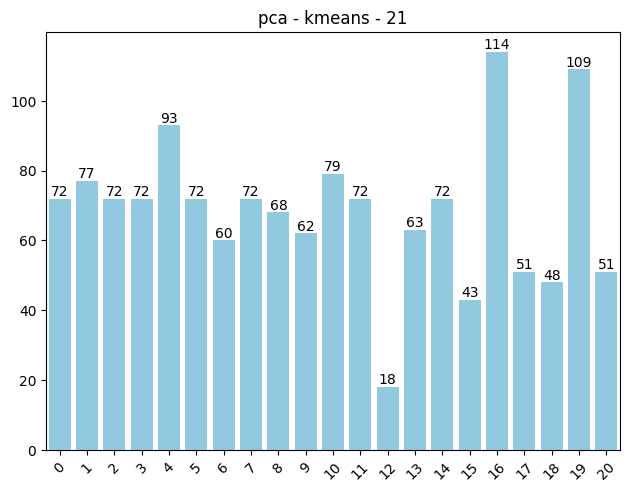

In [296]:
run_kmeans_experiment(X_reduced_pca, dim_reduction='pca')

ica - kmeans - 27
0.0013256459043586594 0.07009186309197471 0.1981513170825103


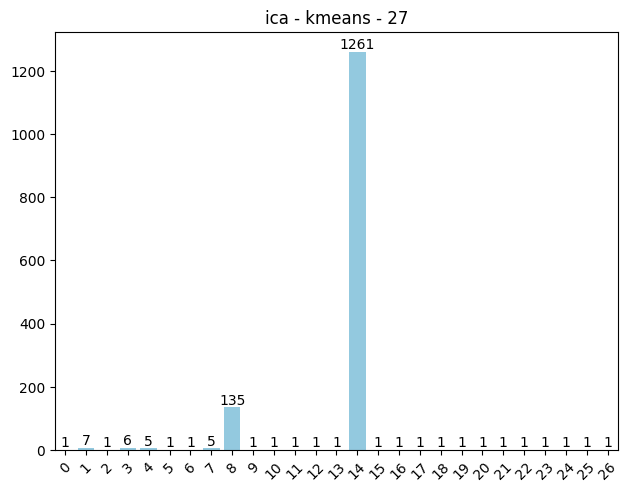

In [297]:
run_kmeans_experiment(X_reduced_ica, dim_reduction='ica')

grp - kmeans - 25
0.6562390540160095 0.8127911941182883 0.6731712223978411


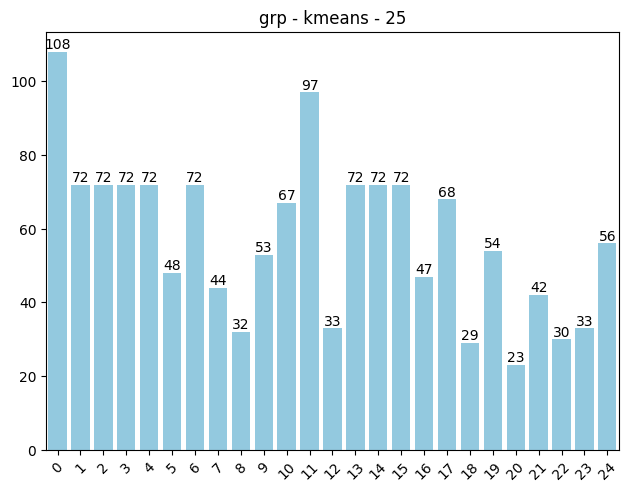

In [298]:
run_kmeans_experiment(X_reduced_grp, dim_reduction='grp')

In [ ]:
run_kmeans_experiment(X_reduced_mds, dim_reduction='mds')

# Measure Closeness to original Clusters

In [338]:
compare_closeness_to_original_clusters_kmeans(X, X_reduced_pca, title_1="PCA clusters closeness to Ground Truth", 
                                       title_2="PCA clusters closeness to Original - wo reducing dimensions")

PCA clusters closeness to Ground Truth
0.6013033134057405 0.7839656880192422 0.6242107571923571
PCA clusters closeness to Original - wo reducing dimensions
0.7904083548064887 0.8936590964438471 0.8024374999848599


In [339]:
compare_closeness_to_original_clusters_kmeans(X, X_reduced_ica, title_1="ICA clusters closeness to Ground Truth", 
                                       title_2="ICA clusters closeness to Original - wo reducing dimensions")

ICA clusters closeness to Ground Truth
0.0015028573958844472 0.06387594280230849 0.21740791071120769
ICA clusters closeness to Original - wo reducing dimensions
0.0019524163815505028 0.06402638194288161 0.22787546561630465


In [340]:
compare_closeness_to_original_clusters_kmeans(X, X_reduced_grp, title_1="GRP clusters closeness to Ground Truth", 
                                       title_2="GRP clusters closeness to Original - wo reducing dimensions")

GRP clusters closeness to Ground Truth
0.6502259840896799 0.7989248961551203 0.6684722135188581
GRP clusters closeness to Original - wo reducing dimensions
0.7785077901742471 0.8770687439880023 0.7903710459479784


In [352]:
compare_closeness_to_original_clusters_kmeans(X, X_reduced_mds, title_1="MDS clusters closeness to Ground Truth", 
                                       title_2="MDS clusters closeness to Original - wo reducing dimensions")

MDS clusters closeness to Ground Truth
0.6196472424652865 0.7924154404574967 0.640916597759407
MDS clusters closeness to Original - wo reducing dimensions
0.7129531087559624 0.8730357803931408 0.7288709740526845


# GMM

In [347]:
compare_closeness_to_original_clusters_gmm(X, X_reduced_pca, title_1="PCA clusters closeness to Ground Truth", 
                                       title_2="PCA clusters closeness to Original - wo reducing dimensions")

PCA clusters closeness to Ground Truth
0.11703404436388919 0.5743998640950984 0.267510625260623
PCA clusters closeness to Original - wo reducing dimensions
0.15009169148855614 0.5627978916645313 0.3066312929972019


In [348]:
compare_closeness_to_original_clusters_gmm(X, X_reduced_ica, title_1="ICA clusters closeness to Ground Truth", 
                                       title_2="ICA clusters closeness to Original - wo reducing dimensions")

ICA clusters closeness to Ground Truth
0.11594586345877798 0.37572781636380637 0.256510372235766
ICA clusters closeness to Original - wo reducing dimensions
0.08431973505903483 0.30874256420963486 0.22106806860386471


In [349]:
compare_closeness_to_original_clusters_gmm(X, X_reduced_grp, title_1="GRP clusters closeness to Ground Truth", 
                                       title_2="GRP clusters closeness to Original - wo reducing dimensions")

GRP clusters closeness to Ground Truth
0.5692336362113796 0.7833409580418448 0.5965367645450735
GRP clusters closeness to Original - wo reducing dimensions
0.5884727547757965 0.7882434396275176 0.6137207750862347


In [353]:
compare_closeness_to_original_clusters_gmm(X, X_reduced_mds, title_1="MDS clusters closeness to Ground Truth", 
                                       title_2="MDS clusters closeness to Original - wo reducing dimensions")

MDS clusters closeness to Ground Truth
0.5949502322748894 0.7979308878551488 0.6193377452849014
MDS clusters closeness to Original - wo reducing dimensions
0.6177412381674898 0.8227483751235134 0.6407857011420298


In [318]:
run_gmm_experiment(X_reduced_pca, dim_reduction='pca')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [319]:
run_gmm_experiment(X_reduced_ica, dim_reduction='ica')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [ ]:
run_gmm_experiment(X_reduced_grp, dim_reduction='grp')

In [ ]:
run_gmm_experiment(X_reduced_mds, dim_reduction='mds')